<a href="https://colab.research.google.com/github/Aishwaryaaaaaaaaaa/CodeClauseTask1-Fake_or_real_news_prediction/blob/main/CodeClauseTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA SCIENCE INTERNSHIP PROGRAM - CodeClause**

**FAKE NEWS DETECTION PROJECT**

# About The Project

In this project i have used several libraries such as NumPy , Pandas , Matplotlib and Seaborn to analyze the data.

The project involve several processes such as Data Pre-processing ,Distribution Of classes , Exploratory Data Analysis , Visualisation through heatmaps , plotting word cloud , stemming , splitting the data into training and testing data.

After preprocessing the data , I used Logistic Regression Algorithm to build a predictive model.The model was trained using the training data and then i evaluated its performance on the test data.

Overall , this project aimed to detect fake or real news out of a dataset and build a predictive model for detecting fake or real news.





Github link :- https://github.com/Aishwaryaaaaaaaaaa/CodeClauseTask1-Fake_or_real_news_prediction

##Data Exploration

In this work, we utilized the fake news dataset from Kaggle to classify untrustworthy news articles as fake news. We have a complete training dataset containing the following characteristics:


*   id: unique id for a news article
*   title: title of a news article
*   text: text of the article; could be incomplete
*   label: a label that marks the article as potentially unreliable denoted by 1 (unreliable or fake) or 0 (reliable)

 It is a binary classification problem in which we must predict if a particular news story is reliable or not.



##Importing the Dependencies

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

##Data Pre-processing

In [4]:
# importing dataset
news_dataset = pd.read_csv('fake_or_real_news.csv')

In [5]:
#checking the shape and columns of dataset
news_dataset.shape
news_dataset.columns

Index(['id', 'title', 'text', 'label'], dtype='object')

In [6]:
# Summary of dataframe
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6335 non-null   int64 
 1   title   6335 non-null   object
 2   text    6335 non-null   object
 3   label   6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
# This is how the dataset looks like:
news_dataset.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
# Checking the statistical information of the dataset
news_dataset.describe()

,id
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [9]:
#Text Word startistics: min.mean, max and interquartile range

txt_length = news_dataset.text.str.split().str.len()
txt_length.describe()

count     6335.000000
mean       776.300710
std        854.333358
min          0.000000
25%        289.000000
50%        597.000000
75%       1024.000000
max      20891.000000
Name: text, dtype: float64

Stats for the title column:

In [10]:
#Title statistics

title_length = news_dataset.title.str.split().str.len()
title_length.describe()

count    6335.000000
mean       10.496448
std         3.985165
min         1.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        53.000000
Name: title, dtype: float64

The statistics for the training and testing sets are as follows:

* The text attribute has a higher word count with an
average of 776 words and 75% having more than 1000 words.

* The title attribute is a short statement with an average of 10 words, and 75% of them are around 13 words.

## Distribution Of Classes

1: Unreliable
0: Reliable
Distribution of labels:
REAL    3171
FAKE    3164
Name: label, dtype: int64


Text(0.5, 1.0, 'the number of news fake/real')

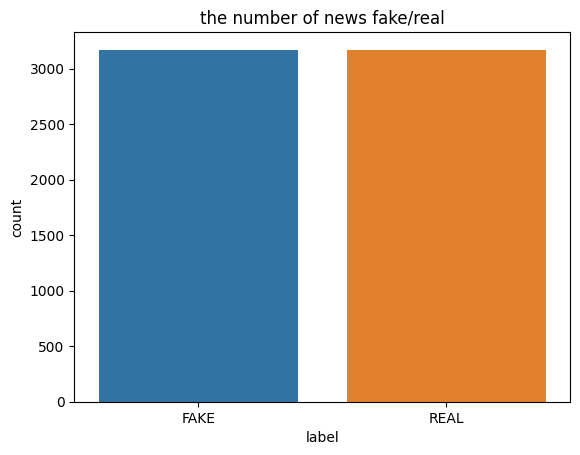

In [13]:
#Counting plot for both labels

sns.countplot(x="label", data=news_dataset)
print("1: Unreliable")
print("0: Reliable")
print("Distribution of labels:")
print(news_dataset.label.value_counts());
plt.title('the number of news fake/real')

In [14]:
print(round(news_dataset.label.value_counts(normalize=True),2)*100);

REAL    50.0
FAKE    50.0
Name: label, dtype: float64


The number of untrustworthy articles (fake or 1) is 3164, while the number of trustworthy articles (reliable or 0) is 3171. Almost 50% of the articles are fake. Therefore, the accuracy metric will measure how well our model is doing when building a classifier.



##Explorative Data Analysis

In [15]:
#Checking the null values
news_dataset.isnull()

,id,title,text,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
6330,False,False,False,False
6331,False,False,False,False
6332,False,False,False,False
6333,False,False,False,False


In [16]:
# counting the null values in the dataset
news_dataset.isnull().sum()

id       0
title    0
text     0
label    0
dtype: int64

<Axes: >

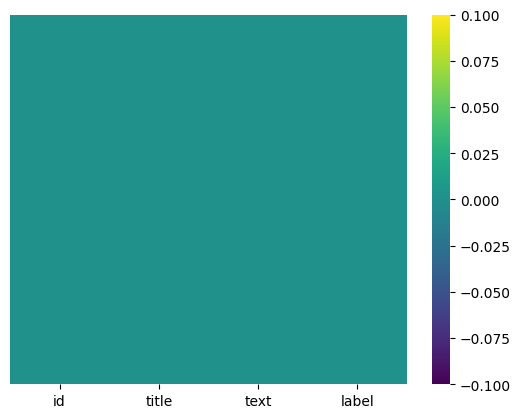

In [17]:
#Visualising to see if there is any null value or not through heatmap
sns.heatmap(news_dataset.isnull() , yticklabels = False , cbar = True , cmap='viridis')




We can clearly see that there is no yellow line which clearly means that there is no any null value.

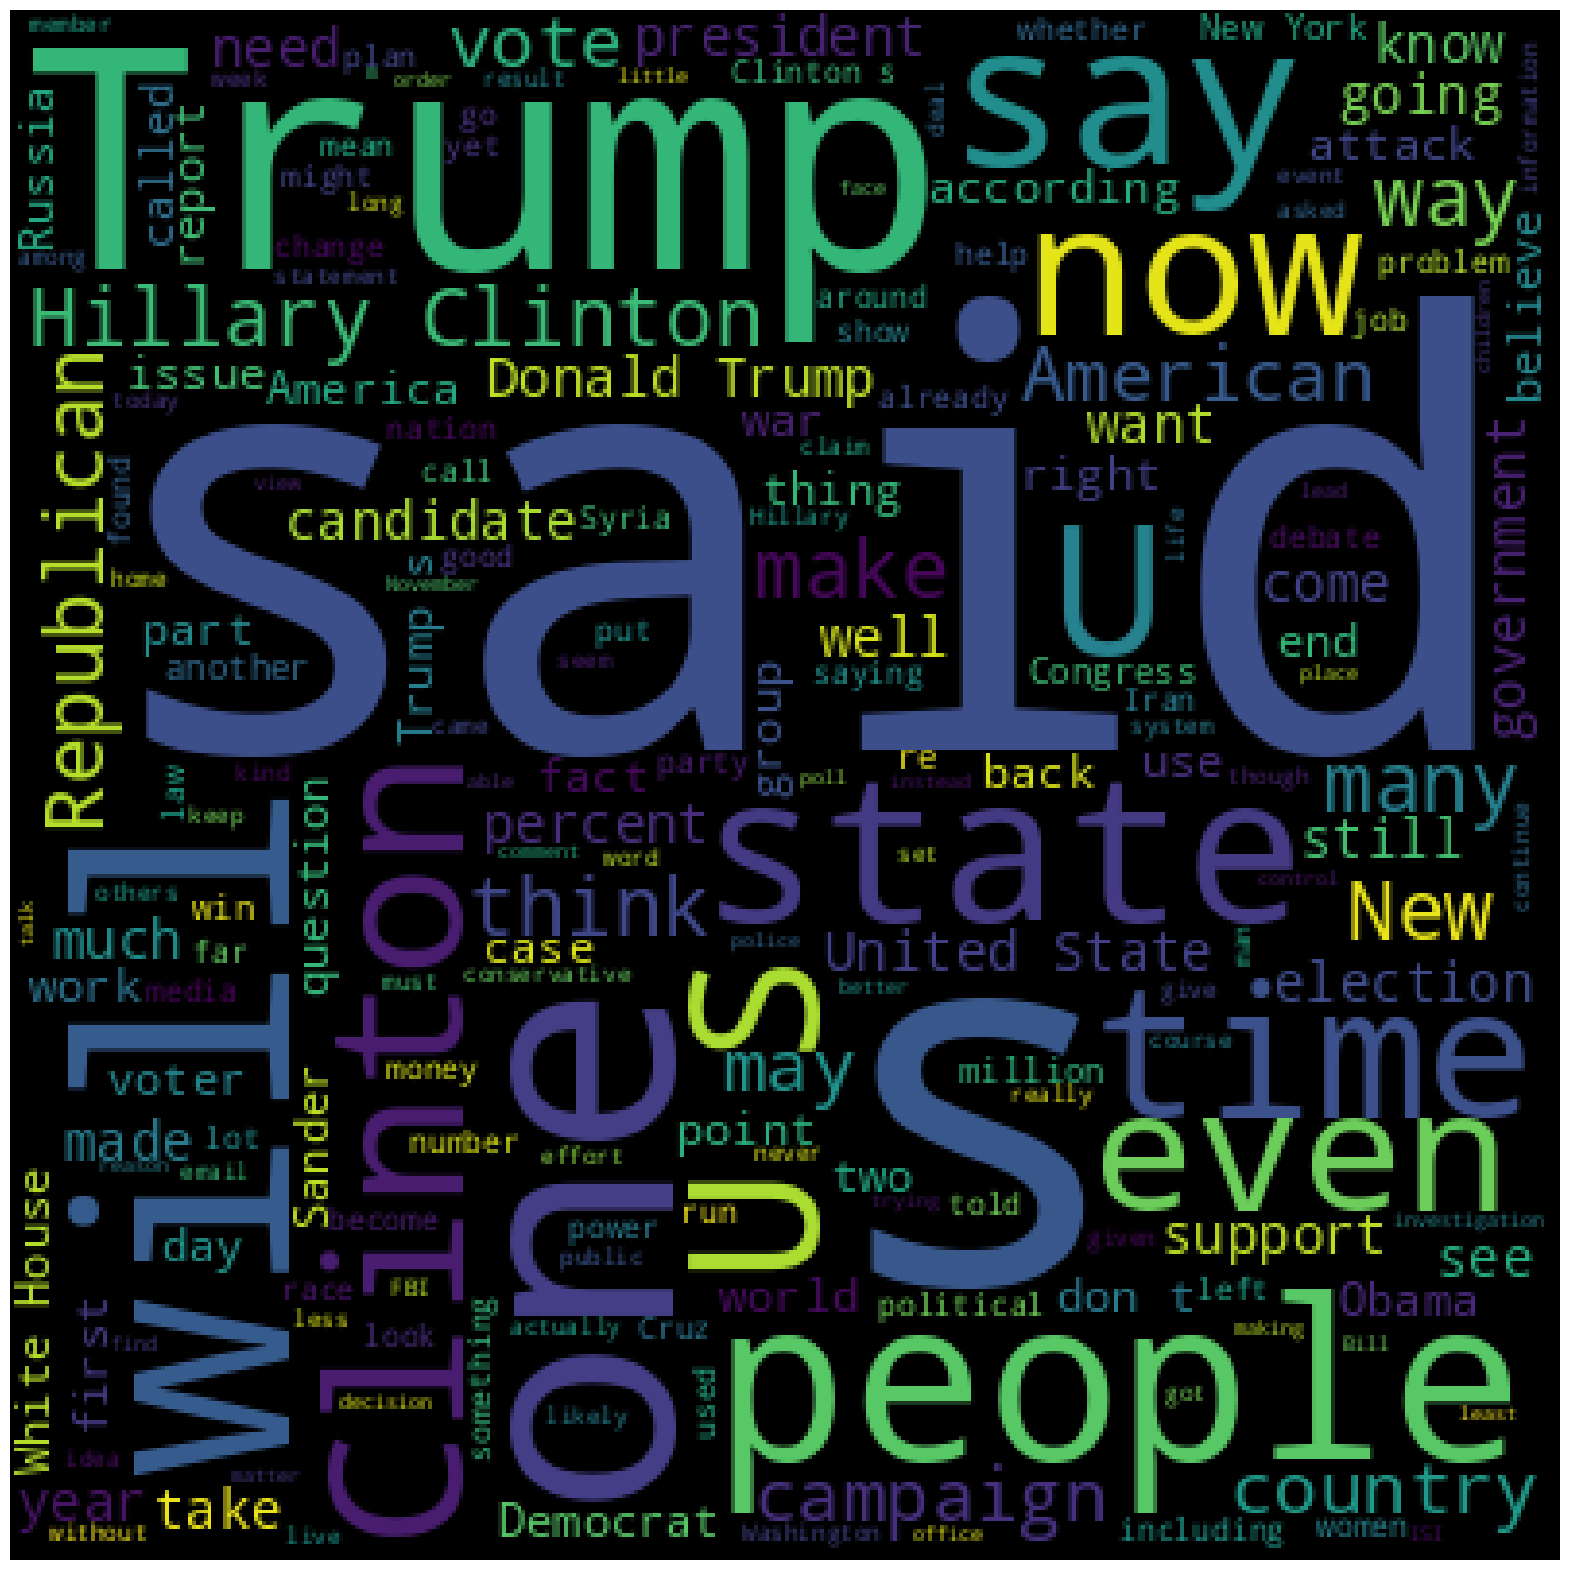

In [25]:
from wordcloud import WordCloud, STOPWORDS

# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=400, height=400)
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(news_dataset['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

In [27]:
# merging the author name and news title
news_dataset['content'] = news_dataset['text']+ news_dataset['title']

In [28]:
print(news_dataset['content'])

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: content, Length: 6335, dtype: object


In [29]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [30]:
print(X)
print(Y)

         id                                              title  \
0      8476                       You Can Smell Hillary’s Fear   
1     10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2      3608        Kerry to go to Paris in gesture of sympathy   
3     10142  Bernie supporters on Twitter erupt in anger ag...   
4       875   The Battle of New York: Why This Primary Matters   
...     ...                                                ...   
6330   4490  State Department says it can't find emails fro...   
6331   8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332   8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333   4021  In Ethiopia, Obama seeks progress on peace, se...   
6334   4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text  \
0     Daniel Greenfield, a Shillman Journalism Fello...   
1     Google Pinterest Digg Linkedin Reddit Stumbleu...   
2     U.S. Secretary of State 

Stemming:

In [31]:
port_stem = PorterStemmer()

In [32]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [33]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [34]:
print(news_dataset['content'])

0       daniel greenfield shillman journal fellow free...
1       googl pinterest digg linkedin reddit stumbleup...
2       u secretari state john f kerri said monday sto...
3       kayde king kaydeek novemb lesson tonight dem l...
4       primari day new york front runner hillari clin...
                              ...                        
6330    state depart told republican nation committe c...
6331    p pb stand plutocrat pentagon post oct wikimed...
6332    anti trump protest tool oligarchi reform alway...
6333    addi ababa ethiopia presid obama conven meet l...
6334    jeb bush suddenli attack trump matter jeb bush...
Name: content, Length: 6335, dtype: object


In [35]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [36]:
print(X)

['daniel greenfield shillman journal fellow freedom center new york writer focus radic islam final stretch elect hillari rodham clinton gone war fbi word unpreced thrown around often elect ought retir still unpreced nomine major polit parti go war fbi exactli hillari peopl done coma patient wake watch hour cnn hospit bed would assum fbi director jame comey hillari oppon elect fbi attack everyon obama cnn hillari peopl circul letter attack comey current media hit piec lambast target trump surpris clinton alli start run attack ad fbi fbi leadership warn entir left wing establish form lynch mob continu go hillari fbi credibl attack media democrat preemptiv head result investig clinton foundat hillari clinton covert struggl fbi agent obama doj peopl gone explos public new york time compar comey j edgar hoover bizarr headlin jame comey role recal hoover fbi fairli practic admit front spout nonsens boston globe publish column call comey resign outdon time editori claim scandal realli attack 

In [37]:
print(Y)

['FAKE' 'FAKE' 'REAL' ... 'FAKE' 'REAL' 'REAL']


In [38]:
Y.shape

(6335,)

In [39]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [40]:
print(X)

  (0, 44059)	0.03038300532239578
  (0, 43936)	0.018233055480266623
  (0, 43628)	0.0369452338661585
  (0, 43624)	0.024001560580697714
  (0, 43597)	0.033091245335652324
  (0, 43564)	0.023614060093316527
  (0, 43561)	0.008736419886150435
  (0, 43487)	0.015792339356844987
  (0, 43427)	0.016675812373589782
  (0, 43339)	0.028383044543415874
  (0, 43338)	0.016806770734797263
  (0, 43301)	0.03826198140183595
  (0, 43259)	0.04257593281983885
  (0, 43162)	0.03487993220805943
  (0, 43107)	0.0358198507153335
  (0, 43093)	0.018397083720054514
  (0, 43014)	0.013918987685454895
  (0, 42983)	0.06194139042699475
  (0, 42877)	0.011496309704277095
  (0, 42846)	0.02701198865471472
  (0, 42770)	0.028665148390729037
  (0, 42709)	0.03272599070215221
  (0, 42661)	0.016346432559531762
  (0, 42613)	0.053298934973891376
  (0, 42579)	0.07036561699238451
  :	:
  (6334, 3995)	0.028590460053468793
  (6334, 3994)	0.026421015657115257
  (6334, 3816)	0.0353231634434905
  (6334, 3809)	0.020484383706941767
  (6334, 3523)

Splitting the dataset to training & test data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

Training the Model: Logistic Regression

In [42]:
model = LogisticRegression()

In [30]:
model.fit(X_train, Y_train)

LogisticRegression()

##Evaluation

accuracy score

In [31]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9532359905288083


In [33]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9171270718232044


# Making a Predictive System

In [35]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

['FAKE']
The news is Fake


In [55]:
print(Y_test[3])

FAKE


### **THANK YOU !!!!**